In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_FS = 'recovstrue_DETSIM.npz'
npz_filename_FS_tb = 'recovstrue_DETSIM_tb.npz'

In [4]:
d_FS = np.load(npz_path+npz_filename_FS)
d_FS_tb = np.load(npz_path+npz_filename_FS_tb)
diff_b1_x_0nubb_FS = d_FS['diff_b1_x_0nubb']
diff_b1_y_0nubb_FS = d_FS['diff_b1_y_0nubb']
diff_b1_z_0nubb_FS = d_FS['diff_b1_z_0nubb']
diff_b1_x_0nubb_FS_tb = d_FS_tb['diff_b1_x_0nubb']
diff_b1_y_0nubb_FS_tb = d_FS_tb['diff_b1_y_0nubb']
diff_b1_z_0nubb_FS_tb = d_FS_tb['diff_b1_z_0nubb']

diff_b2_x_0nubb_FS = d_FS['diff_b2_x_0nubb']
diff_b2_y_0nubb_FS = d_FS['diff_b2_y_0nubb']
diff_b2_z_0nubb_FS = d_FS['diff_b2_z_0nubb']
diff_b2_x_0nubb_FS_tb = d_FS_tb['diff_b2_x_0nubb']
diff_b2_y_0nubb_FS_tb = d_FS_tb['diff_b2_y_0nubb']
diff_b2_z_0nubb_FS_tb = d_FS_tb['diff_b2_z_0nubb']

diff_b1_x_eroi_FS = d_FS['diff_b1_x_selectron']
diff_b1_y_eroi_FS = d_FS['diff_b1_y_selectron']
diff_b1_z_eroi_FS = d_FS['diff_b1_z_selectron']
diff_b1_x_eroi_FS_tb = d_FS_tb['diff_b1_x_selectron']
diff_b1_y_eroi_FS_tb = d_FS_tb['diff_b1_y_selectron']
diff_b1_z_eroi_FS_tb = d_FS_tb['diff_b1_z_selectron']

diff_b2_x_eroi_FS = d_FS['diff_b2_x_selectron']
diff_b2_y_eroi_FS = d_FS['diff_b2_y_selectron']
diff_b2_z_eroi_FS = d_FS['diff_b2_z_selectron']
diff_b2_x_eroi_FS_tb = d_FS_tb['diff_b2_x_selectron']
diff_b2_y_eroi_FS_tb = d_FS_tb['diff_b2_y_selectron']
diff_b2_z_eroi_FS_tb = d_FS_tb['diff_b2_z_selectron']

In [5]:
diff_b1_x_0nubb_FS

array([ 42.51056925,  -0.95715841, -41.32943608, ...,   5.44828491,
       -17.3550415 ,   4.9440155 ])

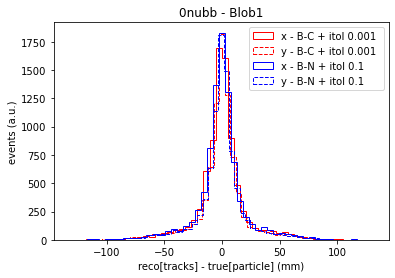

In [6]:
plt.hist(diff_b1_x_0nubb_FS, bins = 50, color='red', histtype='step', label = 'x - B-C + itol 0.001')
plt.hist(diff_b1_y_0nubb_FS, bins = 50, color='red', histtype='step', label = 'y - B-C + itol 0.001 ', linestyle='dashed')
plt.hist(diff_b1_x_0nubb_FS_tb, bins = 50, color='blue', histtype='step', label = 'x - B-N + itol 0.1')
plt.hist(diff_b1_y_0nubb_FS_tb, bins = 50, color='blue', histtype='step', label = 'y - B-N + itol 0.1', linestyle='dashed')


plt.xlabel('reco[tracks] - true[particle] (mm)')
plt.ylabel('events (a.u.)')
plt.title('0nubb - Blob1')
plt.legend(loc=1);
plt.show()

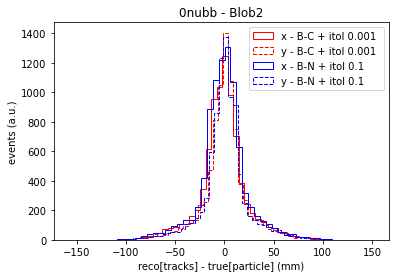

In [7]:
plt.hist(diff_b2_x_0nubb_FS, bins = 50, color='red', histtype='step', label = 'x - B-C + itol 0.001')
plt.hist(diff_b2_y_0nubb_FS, bins = 50, color='red', histtype='step', label = 'y - B-C + itol 0.001 ', linestyle='dashed')
plt.hist(diff_b2_x_0nubb_FS_tb, bins = 50, color='blue', histtype='step', label = 'x - B-N + itol 0.1')
plt.hist(diff_b2_y_0nubb_FS_tb, bins = 50, color='blue', histtype='step', label = 'y - B-N + itol 0.1', linestyle='dashed')


plt.xlabel('reco[tracks] - true[particle] (mm)')
plt.ylabel('events (a.u.)')
plt.title('0nubb - Blob2')
plt.legend(loc=1);
plt.show()

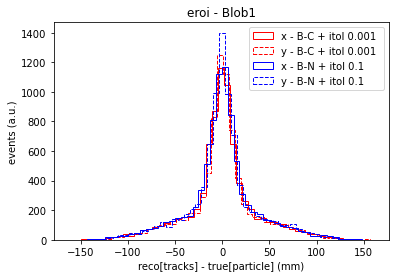

In [8]:
plt.hist(diff_b1_x_eroi_FS, bins = 50, color='red', histtype='step', label = 'x - B-C + itol 0.001')
plt.hist(diff_b1_y_eroi_FS, bins = 50, color='red', histtype='step', label = 'y - B-C + itol 0.001 ', linestyle='dashed')
plt.hist(diff_b1_x_eroi_FS_tb, bins = 50, color='blue', histtype='step', label = 'x - B-N + itol 0.1')
plt.hist(diff_b1_y_eroi_FS_tb, bins = 50, color='blue', histtype='step', label = 'y - B-N + itol 0.1', linestyle='dashed')


plt.xlabel('reco[tracks] - true[particle] (mm)')
plt.ylabel('events (a.u.)')
plt.title('eroi - Blob1')
plt.legend(loc=1);
plt.show()

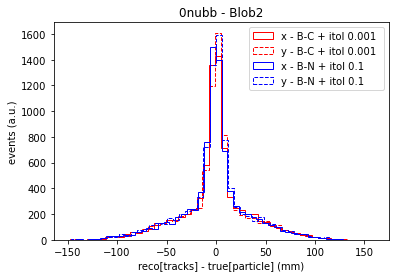

In [9]:
plt.hist(diff_b2_x_eroi_FS, bins = 50, color='red', histtype='step', label = 'x - B-C + itol 0.001')
plt.hist(diff_b2_y_eroi_FS, bins = 50, color='red', histtype='step', label = 'y - B-C + itol 0.001 ', linestyle='dashed')
plt.hist(diff_b2_x_eroi_FS_tb, bins = 50, color='blue', histtype='step', label = 'x - B-N + itol 0.1')
plt.hist(diff_b2_y_eroi_FS_tb, bins = 50, color='blue', histtype='step', label = 'y - B-N + itol 0.1', linestyle='dashed')


plt.xlabel('reco[tracks] - true[particle] (mm)')
plt.ylabel('events (a.u.)')
plt.title('0nubb - Blob2')
plt.legend(loc=1);
plt.show()